The purposes of this exercise to look into different features to observe their relationship,
and Making a model based on several features of individual such as age, physical/family condition
and location against their existing medical expense to be used 
for predicting future medical expenses of individuals that help medical insurance 
to make decision on charging the premium.


* Data Descriptions
The insurance.csv dataset contains 1338 observations (rows) and 7 features (columns). 
The dataset contains 4 numerical features (age, bmi, children and expenses) 
and 3 nominal features (sex, smoker and region)




In [1]:
import os
import numpy as np
import pandas as pd
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

In [2]:
os.chdir(r"C:\Users\User\Desktop\Python Code\K-NN by Irfan\Medicial Expenses")

In [3]:
data = pd.read_csv("insurance.csv")
data

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


<AxesSubplot:xlabel='expenses', ylabel='Count'>

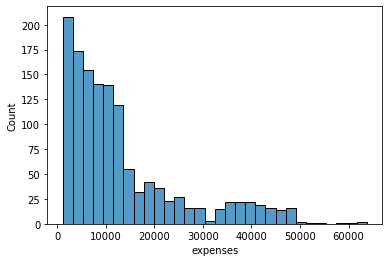

In [4]:
import seaborn as sns
sns.histplot(data=data,x="expenses")

<AxesSubplot:xlabel='expenses', ylabel='Count'>

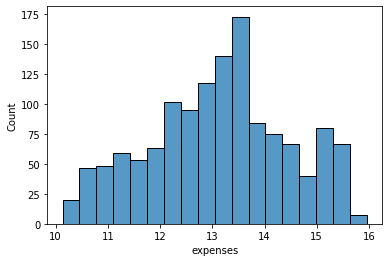

In [5]:
import seaborn as sns
sns.histplot(data=data,x=np.log2(data['expenses']) )

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Exploratory  Data Analysis

In [7]:
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [8]:
data.describe(include="object")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [9]:
Smoker_study=data.groupby("smoker").agg({'expenses':["mean","std","min","max"]})
Smoker_study

expenses                                  
                mean           std       min       max
smoker                                                
no       8434.268449   5993.781756   1121.87  36910.61
yes     32050.231971  11541.547338  12829.46  63770.43

In [10]:
Smoker_study=data.groupby("region").agg({'expenses':["mean","std","min","max"]})
Smoker_study

expenses                                 
                   mean           std      min       max
region                                                  
northeast  13406.384691  11255.802916  1694.80  58571.07
northwest  12417.575169  11072.276880  1621.34  60021.40
southeast  14735.411538  13971.098797  1121.87  63770.43
southwest  12346.937908  11557.179033  1241.57  52590.83

In [11]:
Smoker_study=data.groupby("sex").agg({'expenses':["mean","std","min","max"]})
Smoker_study

expenses                                 
                mean           std      min       max
sex                                                  
female  12569.578897  11128.703817  1607.51  63770.43
male    13956.751420  12971.025897  1121.87  62592.87

# Data Pre-Processing

###  Taking subset data of Number

In [12]:
# #Employee Numeric columns
data_num = data[data.select_dtypes(include=[np.number]).columns.tolist()]
data_num.head(3)

,age,bmi,children,expenses
0,19,27.9,0,16884.92
1,18,33.8,1,1725.55
2,28,33.0,3,4449.46


### Taking subset data of Category 

In [13]:
data_dummies = data[data.select_dtypes(include=['object']).columns.tolist()]
data_dummies.head(3)

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast


### Converting Quality Variable to Number

In [14]:
from sklearn.preprocessing import LabelEncoder
data_dummies=data_dummies.apply(LabelEncoder().fit_transform)
data_dummies.head(3)

,sex,smoker,region
0,0,1,3
1,1,0,2
2,1,0,2


### Combine to Dataset

In [15]:
data_combined = pd.concat([data_num, data_dummies],axis=1)
data_combined.head()

,age,bmi,children,expenses,sex,smoker,region
0,19,27.9,0,16884.92,0,1,3
1,18,33.8,1,1725.55,1,0,2
2,28,33.0,3,4449.46,1,0,2
3,33,22.7,0,21984.47,1,0,1
4,32,28.9,0,3866.86,1,0,1


In [16]:
data_combined['expenses']=np.log2(data_combined['expenses'])
data_combined.head()

,age,bmi,children,expenses,sex,smoker,region
0,19,27.9,0,14.043448,0,1,3
1,18,33.8,1,10.752841,1,0,2
2,28,33.0,3,12.119415,1,0,2
3,33,22.7,0,14.424197,1,0,1
4,32,28.9,0,11.916947,1,0,1


# Data Partition

In [17]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split

train_x = data_combined.drop(['expenses'],axis=1)
train_y = data_combined['expenses']

# Train test split

X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.3,random_state=20)

In [18]:
X_train.head()

,age,bmi,children,sex,smoker,region
682,39,35.3,2,1,1,3
495,20,27.9,0,1,0,0
45,55,37.3,0,1,0,3
1278,39,29.9,1,1,1,0
354,18,38.3,0,0,0,2


# Model Building

In [19]:
# train the decision tree
## Instantiate the model with 5 neighbors. 
model = KNeighborsRegressor(n_neighbors=21)

## Fit the model on the training data.
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=21)

# Step 6 : Predictions on Train Dataset

In [20]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,age,bmi,children,sex,smoker,region,expenses
682,39,35.3,2,1,1,3,15.291455
495,20,27.9,0,1,0,0,10.941796
45,55,37.3,0,1,0,3,14.332476
1278,39,29.9,1,1,1,0,14.455201
354,18,38.3,0,0,0,2,13.786784


In [21]:
train['Predicted']=model.predict(X_train)
train.head()

,age,bmi,children,sex,smoker,region,expenses,Predicted
682,39,35.3,2,1,1,3,15.291455,13.714278
495,20,27.9,0,1,0,0,10.941796,12.410478
45,55,37.3,0,1,0,3,14.332476,13.694757
1278,39,29.9,1,1,1,0,14.455201,13.124354
354,18,38.3,0,0,0,2,13.786784,11.995248


In [22]:
train['Original_expenses']=np.exp(train['expenses'])
train['Original_Predicted']=np.exp(train['Predicted'])

train.head()

,age,bmi,children,sex,smoker,region,expenses,Predicted,Original_expenses,Original_Predicted
682,39,35.3,2,1,1,3,15.291455,13.714278,4.375164e+06,903722.761293
495,20,27.9,0,1,0,0,10.941796,12.410478,5.648870e+04,245359.185703
45,55,37.3,0,1,0,3,14.332476,13.694757,1.676931e+06,886252.388266
1278,39,29.9,1,1,1,0,14.455201,13.124354,1.895895e+06,500996.172359
354,18,38.3,0,0,0,2,13.786784,11.995248,9.716823e+05,161983.157323


# Model Performance on Train data

In [23]:
from sklearn.metrics import mean_squared_error 
from math import sqrt,ceil
rmse_error = sqrt(mean_squared_error(train['expenses'],train['Predicted']))
np.exp(rmse_error)

2.898164341296934

In [24]:
#Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [25]:
MAPE(train['expenses'],train['Predicted'])

6.324896125983079

# Step 8 : Predictions on Test Dataset

In [26]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,age,bmi,children,sex,smoker,region,expenses
698,56,33.7,0,1,0,1,13.422098
520,50,27.4,0,0,0,0,14.647041
1144,50,32.3,2,1,0,3,13.233380
908,63,39.8,3,1,0,3,13.888940
559,19,35.5,0,1,0,1,10.685125


In [27]:
test['Predicted']=model.predict(X_test)
test.head()

,age,bmi,children,sex,smoker,region,expenses,Predicted
698,56,33.7,0,1,0,1,13.422098,14.026689
520,50,27.4,0,0,0,0,14.647041,13.487778
1144,50,32.3,2,1,0,3,13.233380,13.488823
908,63,39.8,3,1,0,3,13.888940,14.120146
559,19,35.5,0,1,0,1,10.685125,11.467627


In [28]:
test['Original_expenses']=np.exp(test['expenses'])
test['Original_Predicted']=np.exp(test['Predicted'])

test.head()

,age,bmi,children,sex,smoker,region,expenses,Predicted,Original_expenses,Original_Predicted
698,56,33.7,0,1,0,1,13.422098,14.026689,6.747501e+05,1.235133e+06
520,50,27.4,0,0,0,0,14.647041,13.487778,2.296832e+06,7.205559e+05
1144,50,32.3,2,1,0,3,13.233380,13.488823,5.587067e+05,7.213092e+05
908,63,39.8,3,1,0,3,13.888940,14.120146,1.076193e+06,1.356130e+06
559,19,35.5,0,1,0,1,10.685125,11.467627,4.370096e+04,9.557120e+04


# Model Performance on Test data

In [29]:
# from sklearn.metrics import mean_squared_error 
from math import sqrt,ceil
rmse_error = sqrt(mean_squared_error(test['expenses'],test['Predicted']))
np.exp(rmse_error)

2.969627753050657

In [30]:
MAPE(test['expenses'],test['Predicted'])

6.4751249483467594

In [31]:
rmse = []
for k in range(0,25):
    k = k+1
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train,y_train)
    y_test_pred = model.predict(X_test)
    rmse_error = sqrt(mean_squared_error(y_test,y_test_pred))
    rmse.append(rmse_error)
    print('RMSE value for k=' , k , 'is:', rmse_error)

RMSE value for k= 1 is: 1.3331708441738979
RMSE value for k= 2 is: 1.1601690915194713
RMSE value for k= 3 is: 1.1391606609354863
RMSE value for k= 4 is: 1.115502875176828
RMSE value for k= 5 is: 1.1150426572788115
RMSE value for k= 6 is: 1.1225520038555106
RMSE value for k= 7 is: 1.1136826111562674
RMSE value for k= 8 is: 1.1095497154598857
RMSE value for k= 9 is: 1.0994207145920099
RMSE value for k= 10 is: 1.1033524861637354
RMSE value for k= 11 is: 1.1005854325170041
RMSE value for k= 12 is: 1.0960747415319487
RMSE value for k= 13 is: 1.0951477451390998
RMSE value for k= 14 is: 1.0958888347330062
RMSE value for k= 15 is: 1.0959234734492438
RMSE value for k= 16 is: 1.0953849607788206
RMSE value for k= 17 is: 1.0928561209289502
RMSE value for k= 18 is: 1.0983300754608252
RMSE value for k= 19 is: 1.0940635801039174
RMSE value for k= 20 is: 1.093149250623762
RMSE value for k= 21 is: 1.088436609286257
RMSE value for k= 22 is: 1.0912305067077603
RMSE value for k= 23 is: 1.0894712713847734
